In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [39]:
df = pd.read_csv("FuelConsumption.csv")

In [40]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [55]:
#Lets select some features that we want to use for regression.
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


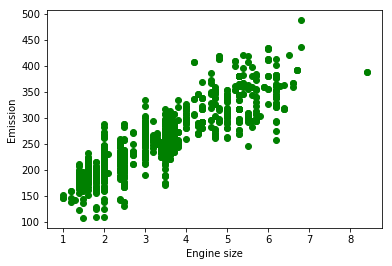

In [42]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [43]:
#creating training and test data
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size =0.8, random_state= 0)

In [49]:
x_train

array([[  1.5,   4. ,   4.9],
       [  5. ,   8. ,   9.9],
       [  5.7,   8. ,  12.7],
       [  6.2,   8. ,  16.1],
       [  2. ,   4. ,   5.5],
       [  3.5,   6. ,   8.5],
       [  3.7,   6. ,   8.1],
       [  5.9,  12. ,  12.6],
       [  3.6,   6. ,   9.6],
       [  1.8,   4. ,   6.7],
       [  3.5,   6. ,  11.1],
       [  5.3,   8. ,  17.7],
       [  3.6,   6. ,  10.2],
       [  6. ,  12. ,  11.5],
       [  2.4,   4. ,   7. ],
       [  4. ,   6. ,  11.5],
       [  2. ,   4. ,   5.8],
       [  3.6,   6. ,   9. ],
       [  4. ,   8. ,  10.6],
       [  4.7,   8. ,  12.2],
       [  2. ,   4. ,   7.4],
       [  4.4,   8. ,   9.8],
       [  3.6,   6. ,   8.7],
       [  2.5,   4. ,   7.8],
       [  1.4,   4. ,   6.7],
       [  5.3,   8. ,  19.3],
       [  3. ,   6. ,   8.4],
       [  3.5,   6. ,   7.3],
       [  2. ,   4. ,   6.7],
       [  3.6,   6. ,  10.1],
       [  3. ,   6. ,   8.7],
       [  5.3,   8. ,  19.3],
       [  3.8,   6. ,   9. ],
       [  

In [50]:
x_test

array([[  1.6,   4. ,   7. ],
       [  2. ,   4. ,   5.8],
       [  5.3,   8. ,  14.6],
       [  1.8,   4. ,   6. ],
       [  5. ,   8. ,  10.2],
       [  4. ,   6. ,  11.8],
       [  3.5,   6. ,   9. ],
       [  3.5,   6. ,   7.8],
       [  1.4,   4. ,   6.3],
       [  2.7,   6. ,   7.4],
       [  1.6,   4. ,   7.5],
       [  1.6,   4. ,   6.6],
       [  3.5,   6. ,   9.7],
       [  4.8,   8. ,  14.2],
       [  1.6,   4. ,   6.8],
       [  2.5,   4. ,   6.1],
       [  1.6,   4. ,   7.8],
       [  6.2,   8. ,  17.8],
       [  4. ,   6. ,  11. ],
       [  4.2,   8. ,  10.9],
       [  5.3,   8. ,  14.2],
       [  3.5,   6. ,  11.3],
       [  3.5,   6. ,  13.9],
       [  3. ,   6. ,   6.4],
       [  4.4,   8. ,   9.6],
       [  2. ,   4. ,   7.9],
       [  2. ,   4. ,   8.5],
       [  6. ,  12. ,  12.2],
       [  5.3,   8. ,  14.6],
       [  1.6,   4. ,   8.2],
       [  2.5,   4. ,   7.6],
       [  2. ,   4. ,   8.2],
       [  3.6,   6. ,  12.7],
       [  

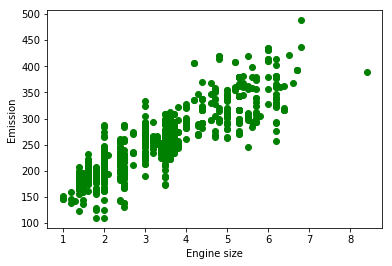

In [58]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [51]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 10.76187602   6.11574781   8.88757379]]


In [52]:
#prediction
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 608.19
Variance score: 0.85


In [46]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 11.04920842   9.87705004  11.0190455 ]]


In [47]:
#prediction
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 595.72
Variance score: 0.86
